Ref: https://mygeoblog.com/2019/06/25/mask-netcdf-using-shp-file/
mask netcdf using shp file

In [2]:
import netCDF4
import numpy as np
from osgeo import gdal,osr,ogr
import matplotlib.pyplot as plt

In [3]:
# function to create the mask of your shapefile
def makeMask(lon,lat,res):
    source_ds = ogr.Open(shapefile)
    source_layer = source_ds.GetLayer()
 
    # Create high res raster in memory
    mem_ds = gdal.GetDriverByName('MEM').Create('', lon.size, lat.size, gdal.GDT_Byte)
    mem_ds.SetGeoTransform((lon.min(), res, 0, lat.max(), 0, -res))
    band = mem_ds.GetRasterBand(1)
 
    # Rasterize shapefile to grid
    gdal.RasterizeLayer(mem_ds, [1], source_layer, burn_values=[1])
 
    # Get rasterized shapefile as numpy array
    array = band.ReadAsArray()
 
    # Flush memory file
    mem_ds = None
    band = None
    return array

In [4]:
# set the data directories
datadir = "/home/yoviajo/Documentos/lab/geom/python/82/geodat/"
shapefile = "/home/yoviajo/Documentos/lab/geom/geodat/vector/bo_limite_nacional_b.shp"
infile = "VHRAC.nc"
ncs = datadir + infile

In [6]:
# read the netcdf data file
nc = netCDF4.Dataset(ncs,'r')
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Title: LIS Very High Resolution Annual Climatology (VHRAC)
    ATTENTION: This dataset has both 49-day and 1.0x1.0 degree boxcar Moving Average. Please read reference below for details.
    Source: Tropical Rainfall Measuring Mission
    Reference: Albrecht, R. I., S. J. Goodman, D. E. Buechler, R. J. Blakeslee, H. J. Christian (2016): Where are the lightning hotspots on Earth? Bulletin of American Meteorological Society, ...
    D.O.I: ...
    Version: 1.0
    Institutions: University of Sao Paulo (USP), NOAA NESDIS, NASA MSFC
    history: R. I. Albrecht, Mon Feb  1 15:01:32 2016
    dimensions(sizes): Longitude(3600), Latitude(760), Time(365)
    variables(dimensions): float64 Longitude(Longitude), float64 Latitude(Latitude), float64 Time(Time), float32 VHRAC_LIS_FRD(Time, Latitude, Longitude), float32 VHRAC_LIS_VT(Time, Latitude, Longitude)
    groups: 

In [7]:
# obtener la variable densidad de tasa de rayos (flash rate density - FRD)
frd = nc.variables['VHRAC_LIS_FRD'][:]

In [9]:
# show the precipitation
#plt.imshow(frd)
#plt.show()
# get the longitude information
lons = nc.variables['Longitude'][:]
# get the latitude information
lats = nc.variables['Latitude'][:]
# calculate the cellsize
cellsize = lons[:][1] - lons[:][0]

ERROR 1: PROJ: proj_identify: Open of /home/yoviajo/anaconda3/envs/netcdf/share/proj failed


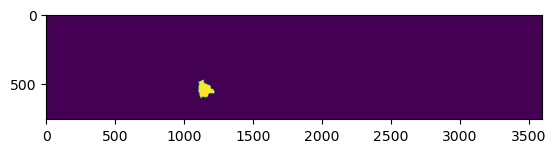

In [10]:
# create the mask
mask = makeMask(lons,lats,cellsize)
 
# show the mask
plt.imshow(mask)
plt.show()

In [12]:
# mask the precipitation data
dray = np.ma.masked_where(mask==0,frd)
 
plt.imshow(dray)
plt.show()
 
# print some stats
print(np.min(dray), np.mean(dray), np.max(dray))

: 

: 